### 4-1．고객의 특성을 알자
#### 데이터의 리드와 확인

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Pandas의 로드
import pandas as pd

# 파일 리드
bank_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝 데이터 전처리 입문_로드북/chap3-4/data/bank-prep.csv', sep=',')

# 선두에서 5행까지 표시
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터 형을 확인
print(bank_df.dtypes)

(6933, 32)
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
divorced     int64
married      int64
single       int64
primary      int64
secondary    int64
tertiary     int64
cellular     int64
telephone    int64
unknown      int64
apr          int64
aug          int64
dec          int64
feb          int64
jan          int64
jul          int64
jun          int64
mar          int64
may          int64
nov          int64
oct          int64
sep          int64
dtype: object


#### データの正規化

In [4]:
# MinMaxScaler의 로드
from sklearn.preprocessing import MinMaxScaler

# 데이터 세트에서 목적변수를 제외
bank_df = bank_df.drop('y', axis=1)

# 범위변환의 인스턴스를 생성
mc = MinMaxScaler()
mc.fit(bank_df)

# bank_df의 각항목을 정규화
bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns=bank_df.columns)
bank_df_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
# StandardScaler의 로드
from sklearn.preprocessing import StandardScaler

# Z변환 인스턴스 생성
sc = StandardScaler()
sc.fit(bank_df)

# bank_df의 각항목을 정규화
bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [6]:
# 각 항목의 평균과 표준편차를 확인
print(bank_df_sc.mean())
print(bank_df_sc.std())

age         -2.859389e-16
default      4.099482e-17
balance     -3.279586e-17
housing      1.065865e-16
loan        -3.279586e-17
day          8.198964e-18
duration    -2.049741e-18
campaign     0.000000e+00
pdays       -3.279586e-17
previous     3.279586e-17
divorced    -8.198964e-18
married     -2.869637e-17
single      -9.838757e-17
primary      7.379068e-17
secondary    1.065865e-16
tertiary    -8.198964e-18
cellular     1.967751e-16
telephone   -3.279586e-17
unknown     -9.838757e-17
apr         -1.639793e-17
aug          0.000000e+00
dec          1.639793e-17
feb          0.000000e+00
jan         -4.919379e-17
jul          0.000000e+00
jun         -3.279586e-17
mar         -1.639793e-17
may          9.838757e-17
nov         -3.279586e-17
oct          1.639793e-17
sep         -6.559171e-17
dtype: float64
age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign     1.000072
pda

### 4-2．고객의 그룹화
#### 계층적 클러스터링

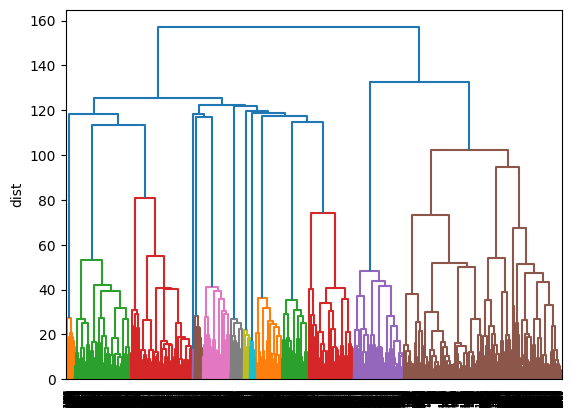

In [7]:
# Linkage, Dendrogram의 로드
from scipy.cluster.hierarchy import linkage, dendrogram
# Matplotlib의 로드
import matplotlib.pyplot as plt
%matplotlib inline

# 계층적 클러스터링의 실행
hcls = linkage(bank_df_sc, metric='euclidean', method='ward')
dendrogram(hcls)

# 덴드로그램의 작성
plt.ylabel('dist')
plt.show()

In [8]:
# fcluster의 로드
from scipy.cluster.hierarchy import fcluster

# 고객별로 클러스터ID를 부여
cst_group = fcluster(hcls, 100, criterion='distance')

# 고객별 클러스터 ID를 확인
print(cst_group)

[14 14 14 ... 12 12 12]


#### 비계층적 클러스터링

In [9]:
# KMeans의 로드
from sklearn.cluster import KMeans

# 고객을 10개그룹으로 분할
kcls = KMeans(n_clusters=10)
cst_group = kcls.fit_predict(bank_df_sc)

# 고객별 클러스터ID를 확인
print(cst_group)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[7 7 7 ... 6 6 6]


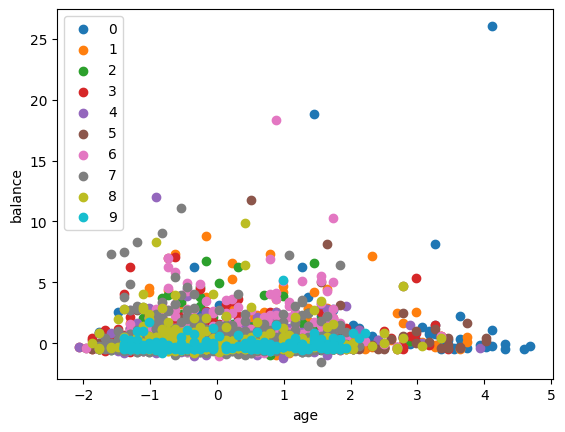

In [10]:
# 고객의 클러스터 ID마다 색을 부여하여 산포도를 작성
for i in range(10):
    tmp = bank_df_sc[cst_group == i]
    plt.scatter(tmp['age'], tmp['balance'], label=i)

plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [11]:
# 데이터 세트에 클러스터 ID를 추가
bank_df_sc['group'] = cst_group

bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,7
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,7
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,7
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,7
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,7


In [12]:
# 그룹별 데이터 건수를 확인
print(bank_df_sc['group'].value_counts())

7    1663
1    1219
4     967
2     737
3     654
6     568
0     410
8     403
9     188
5     124
Name: group, dtype: int64


In [13]:
# 클러스터0의 통계량을 확인
bank_df_sc[bank_df_sc['group']==0].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,0.689651,-0.082793,0.154448,-0.245125,-0.004292,0.016342,-0.072730,0.217046,0.012842,-0.042827,...,0.142111,-0.167406,0.412456,-0.281516,0.096307,-0.301797,0.292673,-0.134949,0.086254,0.0
std,1.281940,0.633879,1.811443,1.003525,0.997326,1.044567,1.119473,1.072570,0.999845,0.706008,...,1.214895,0.000000,1.266194,0.468766,1.395123,0.809025,1.318584,0.000000,1.325445,0.0
min,-1.869332,-0.137148,-0.635194,-1.140627,-0.444540,-1.758049,-0.957063,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-0.134949,-0.112073,0.0
25%,-0.348363,-0.137148,-0.416434,-1.140627,-0.444540,-0.792715,-0.706405,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-0.134949,-0.112073,0.0
50%,0.697303,-0.137148,-0.276659,-1.140627,-0.444540,0.051953,-0.386793,-0.238367,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-0.134949,-0.112073,0.0
75%,1.457787,-0.137148,0.145766,0.876711,-0.444540,0.745787,0.093091,0.433285,-0.418664,-0.310149,...,-0.267818,-0.167406,2.300280,-0.351657,-0.100262,-0.662104,-0.320275,-0.134949,-0.112073,0.0
max,4.689845,7.291369,26.055019,0.876711,2.249514,1.861955,9.054343,6.142329,4.170989,6.200873,...,3.733873,-0.167406,2.300280,2.843677,9.973879,1.510337,3.122313,-0.134949,8.922795,0.0
